In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
file_path = "complete_dataset.csv"
df = pd.read_csv(file_path)
df.head()


,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [4]:
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())
df['date'] = pd.to_datetime(df['date'])

Dataset Shape: (2106, 14)

Column Names: ['date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall', 'school_day', 'holiday']

Missing Values:
 date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64

Data Types:
 date                object
demand             float64
RRP                float64
demand_pos_RRP     float64
RRP_positive       float64
demand_neg_RRP     float64
RRP_negative       float64
frac_at_neg_RRP    float64
min_temperature    float64
max_temperature    float64
solar_exposure     float64
rainfall           float64
school_day          object
holiday             object
dtype: object

Summary Statistics:
 

In [5]:
df['solar_exposure'] = df['solar_exposure'].fillna(df['solar_exposure'].median())
df['rainfall'] = df['rainfall'].fillna(df['rainfall'].median())
print("\nMissing Values After Handling:\n", df.isnull().sum())



Missing Values After Handling:
 date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64


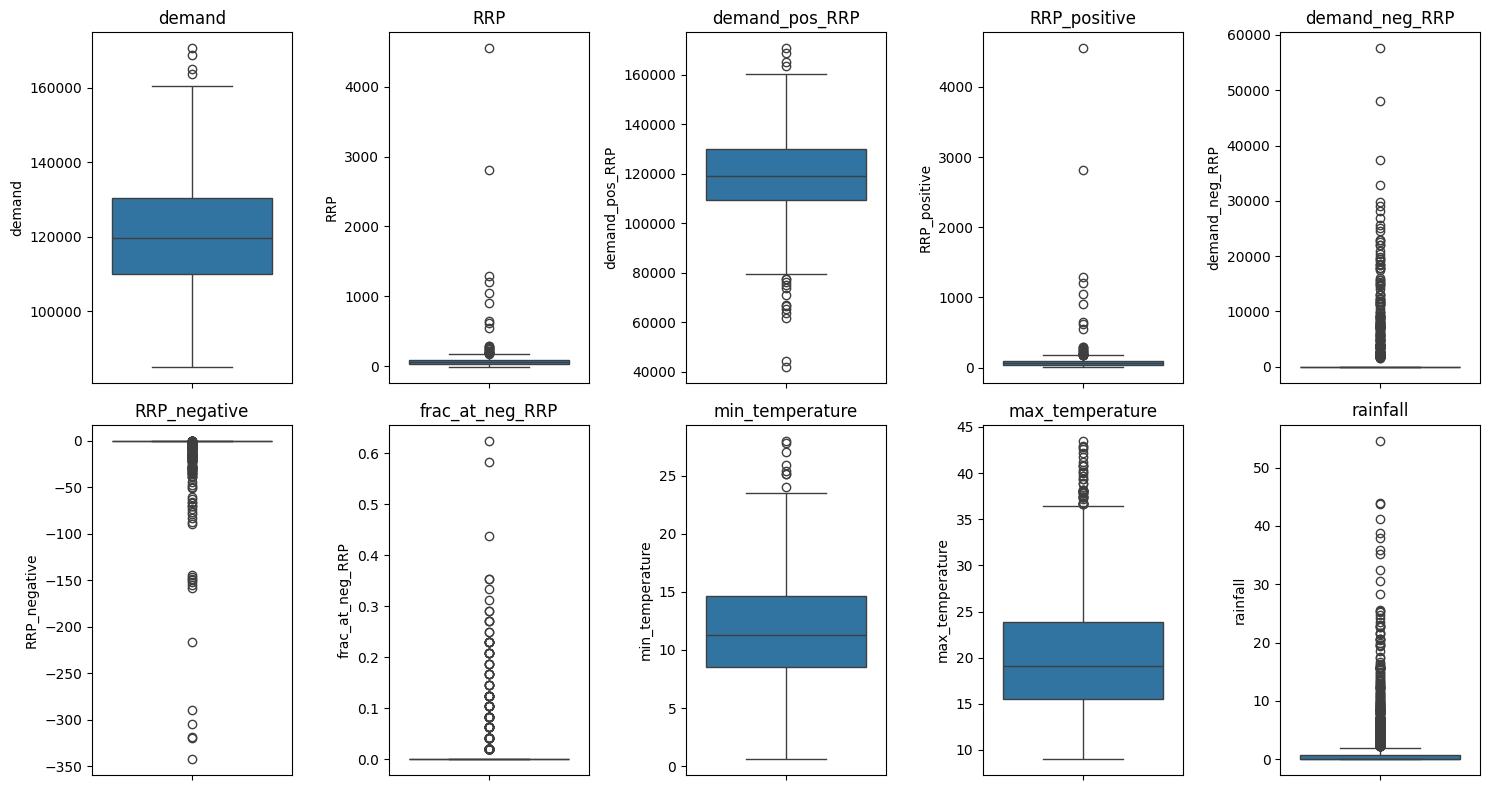

In [6]:
outlier_features = ['demand', 'RRP', 'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature', 'max_temperature', 'rainfall']
plt.figure(figsize=(15, 8))
for i, feature in enumerate(outlier_features, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(y=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

In [7]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
outlier_features = ['demand', 'RRP', 'demand_pos_RRP', 'RRP_positive', 
                    'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 
                    'min_temperature', 'max_temperature', 'rainfall']
df_cleaned = remove_outliers_iqr(df, outlier_features)
print("Before removing outliers:", df.shape)
print("After removing outliers:", df_cleaned.shape)

Before removing outliers: (2106, 14)
After removing outliers: (1550, 14)


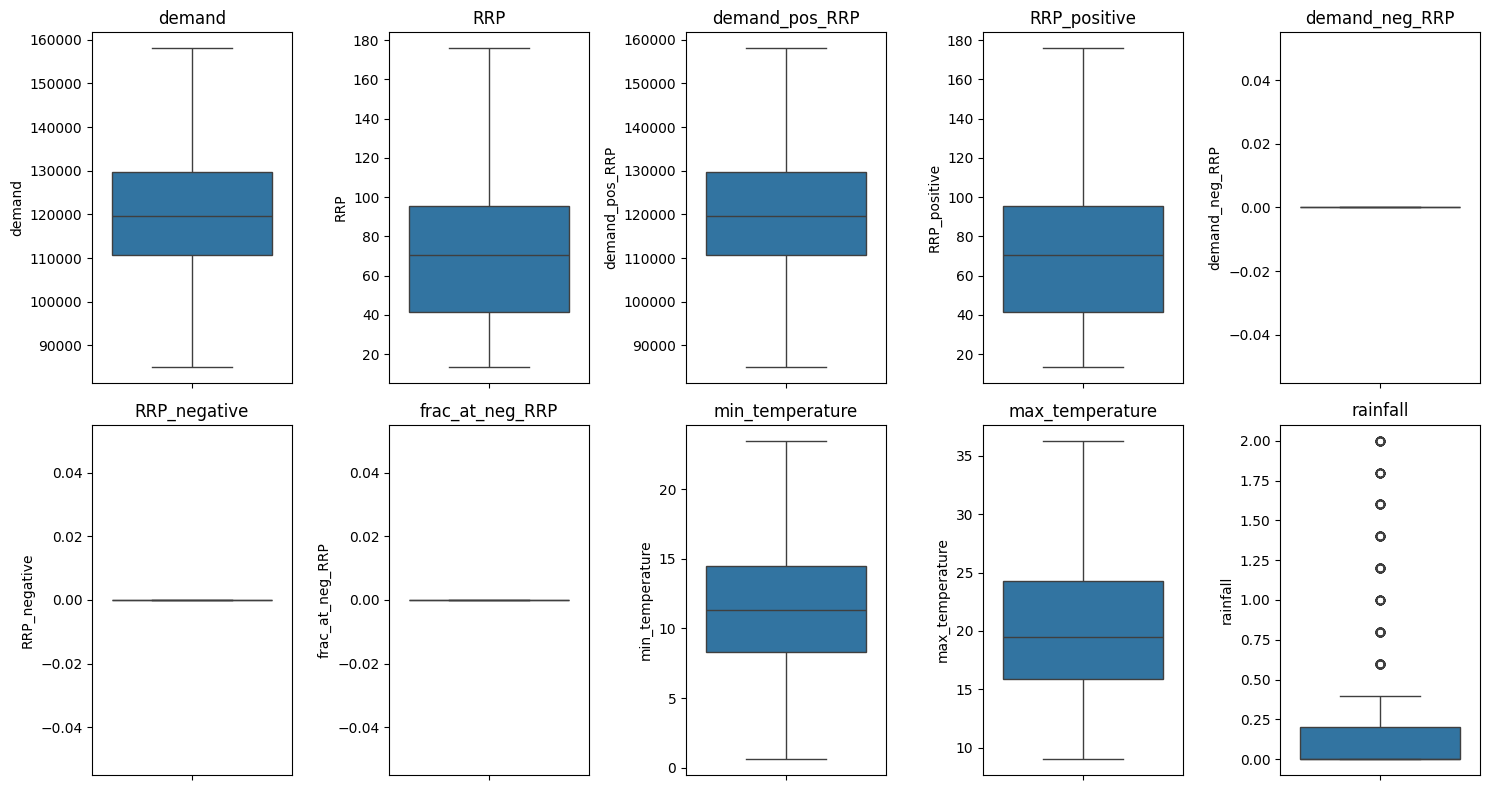

In [8]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(outlier_features, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(y=df_cleaned[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

# 1.Demand and Price Analysis

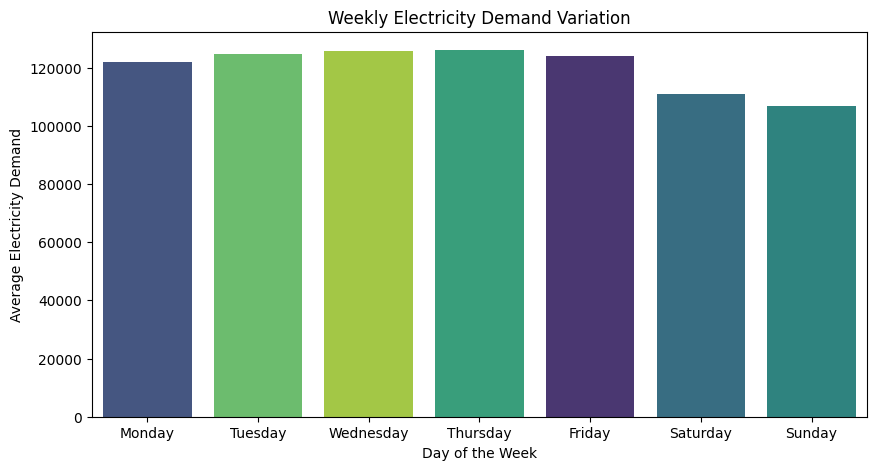

In [9]:
# Extract day of the week
df['day_of_week'] = df['date'].dt.day_name()
# Compute average demand per day of the week
weekly_demand = df.groupby('day_of_week')['demand'].mean()
# Define order for plotting
week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize=(10, 5))
sns.barplot(x=weekly_demand.index, y=weekly_demand.values,hue=weekly_demand.index, order=week_order, palette="viridis")
plt.xlabel("Day of the Week")
plt.ylabel("Average Electricity Demand")
plt.title("Weekly Electricity Demand Variation")
plt.show()


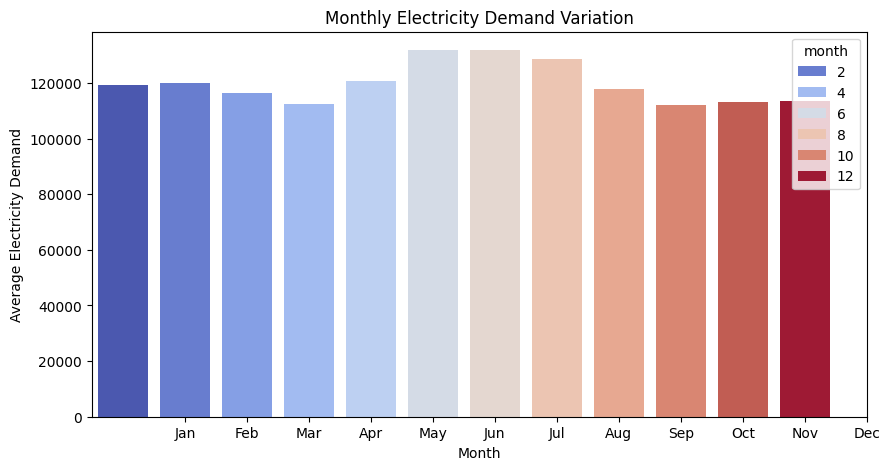

In [10]:
# Extract month from date
df['month'] = df['date'].dt.month
# Compute average demand per month
monthly_demand = df.groupby('month')['demand'].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_demand.index, y=monthly_demand.values,hue=monthly_demand.index,palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Average Electricity Demand")
plt.title("Monthly Electricity Demand Variation")
plt.xticks(range(1, 13), 
           ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()


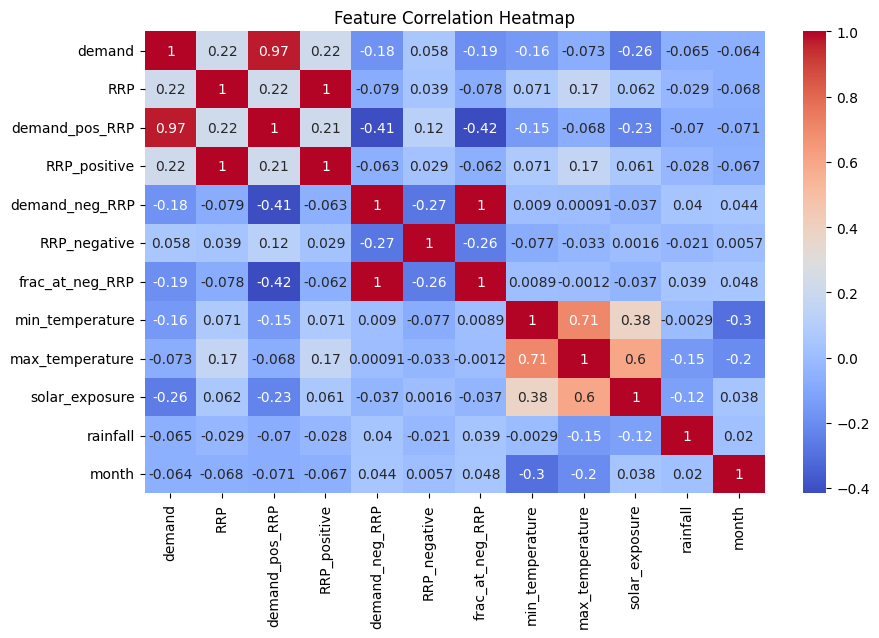

In [11]:
plt.figure(figsize=(10, 6))
df_numeric = df.select_dtypes(include=[np.number])
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Analyze the relationship between demand and electricity price (RRP).

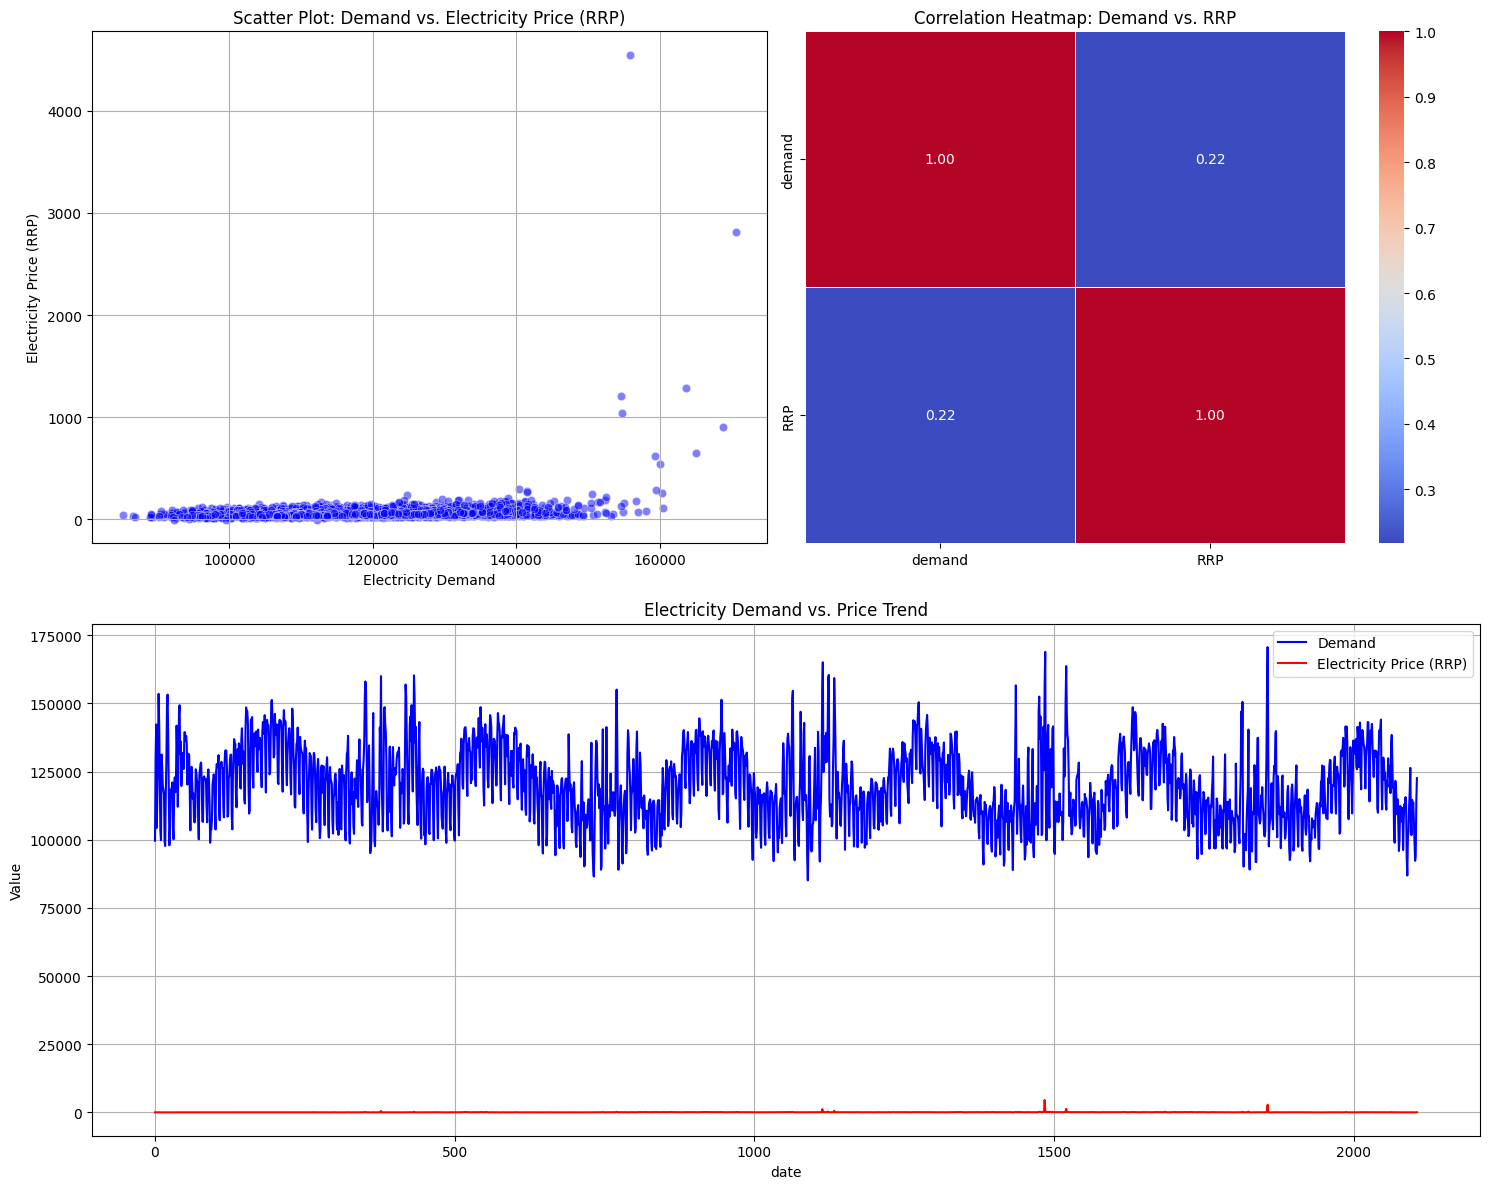

In [12]:
df = df[['demand', 'RRP']].dropna()  
plt.figure(figsize=(15, 12))
#  Scatter Plot: Demand vs. Price (RRP)
plt.subplot(2, 2, 1)
sns.scatterplot(x=df['demand'], y=df['RRP'], alpha=0.5, color='b')
plt.title("Scatter Plot: Demand vs. Electricity Price (RRP)")
plt.xlabel("Electricity Demand")
plt.ylabel("Electricity Price (RRP)")
plt.grid()
#  Correlation Heatmap
plt.subplot(2, 2, 2)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Demand vs. RRP")
#  Line Plot: Demand vs. RRP Over Time
plt.subplot(2, 1, 2)
sns.lineplot(data=df, x=df.index, y=df['demand'], label="Demand", color='b')
sns.lineplot(data=df, x=df.index, y=df['RRP'], label="Electricity Price (RRP)", color='r')
plt.title("Electricity Demand vs. Price Trend")
plt.xlabel("date")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Weather Impact Analysis

# Correlate demand with temperature, solar exposure, and rainfall.

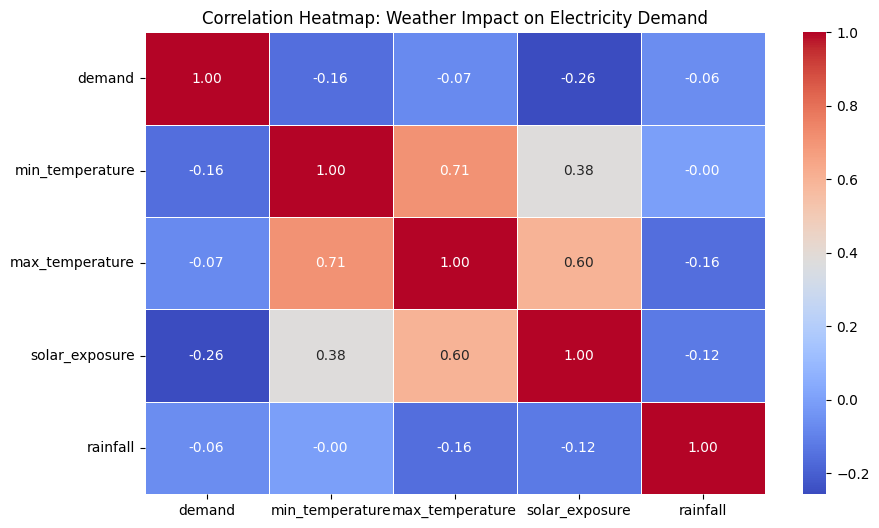

In [22]:

# Select relevant columns for weather impact analysis
weather_columns = ['demand', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']
# Compute correlation matrix
corr_matrix_weather = df[weather_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_weather, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Weather Impact on Electricity Demand")
plt.show()

# Analyze seasonal trends

<Figure size 1200x600 with 0 Axes>

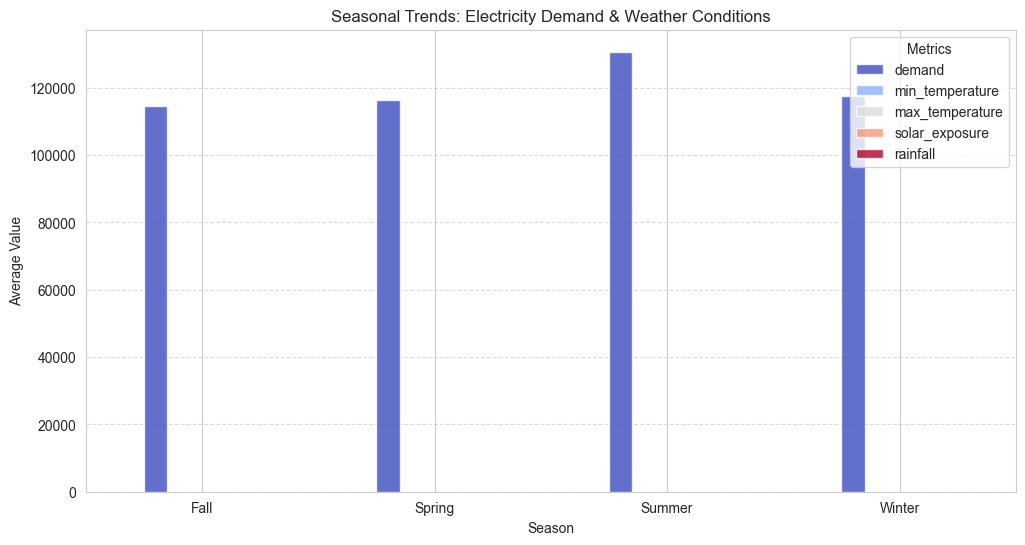

In [58]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')
# Extract month from date
df['month'] = df['date'].dt.month
# Define seasons based on months
def get_season(month):
    if month in [12, 1, 2]:  
        return 'Winter'
    elif month in [3, 4, 5]:  
        return 'Spring'
    elif month in [6, 7, 8]:  
        return 'Summer'
    else:  
        return 'Fall'
df['season'] = df['month'].apply(get_season)
# Compute average demand and weather conditions for each season
seasonal_trends = df.groupby('season')[['demand', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']].mean()
plt.figure(figsize=(12, 6))
seasonal_trends.plot(kind='bar', figsize=(12, 6), colormap='coolwarm', alpha=0.8)
plt.title("Seasonal Trends: Electricity Demand & Weather Conditions")
plt.xlabel("Season")
plt.ylabel("Average Value")
plt.legend(title="Metrics")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Study how holidays and school days impact demand.

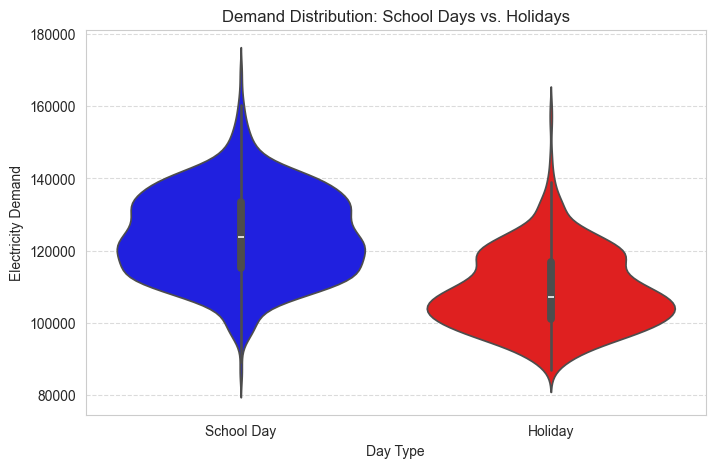

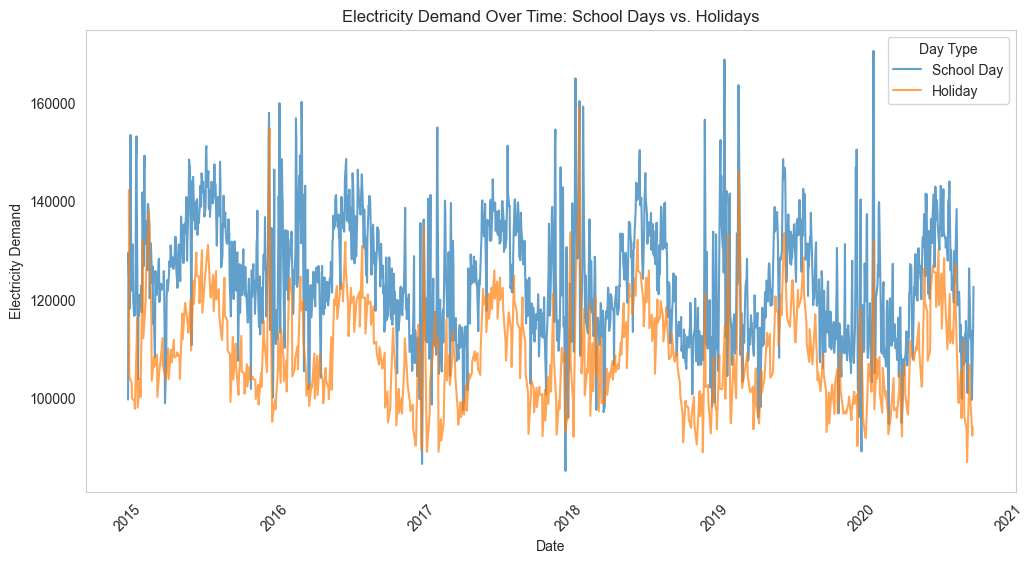

In [59]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
# Extract day of the week 
df['day_of_week'] = df['date'].dt.dayofweek
# Define 'School Day' (Monday–Friday) vs. 'Holiday' (Saturday & Sunday)
df['day_type'] = df['day_of_week'].apply(lambda x: 'School Day' if x < 5 else 'Holiday')
# Violin Plot: Demand Distribution
plt.figure(figsize=(8, 5))
sns.violinplot(x='day_type', y='demand', hue='day_type', data=df, palette={'School Day': 'blue', 'Holiday': 'red'}, legend=False)
plt.xlabel("Day Type")
plt.ylabel("Electricity Demand")
plt.title("Demand Distribution: School Days vs. Holidays")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# Line Plot: Demand Trend Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='demand', hue='day_type', alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Electricity Demand")
plt.title("Electricity Demand Over Time: School Days vs. Holidays")
plt.legend(title="Day Type")
plt.xticks(rotation=45)
plt.grid()
plt.show()


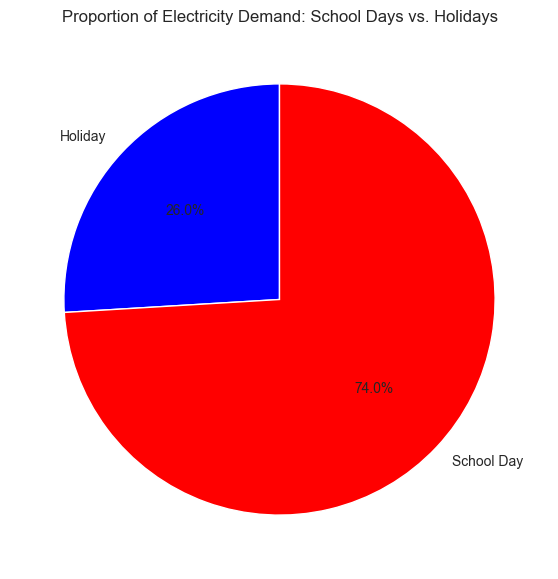

In [60]:
demand_sums = df.groupby('day_type')['demand'].sum()
plt.figure(figsize=(7, 7))
plt.pie(demand_sums, labels=demand_sums.index, autopct='%1.1f%%', colors=['blue', 'red'], startangle=90)
plt.title("Proportion of Electricity Demand: School Days vs. Holidays")
plt.show()


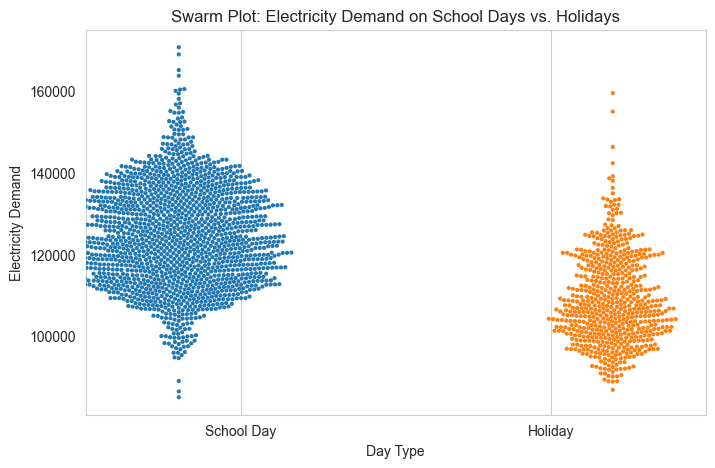

In [61]:
plt.figure(figsize=(8, 5))
sns.swarmplot(x='day_type', y='demand', hue='day_type', data=df, size=3, dodge=True, legend=False)
plt.xlabel("Day Type")
plt.ylabel("Electricity Demand")
plt.title("Swarm Plot: Electricity Demand on School Days vs. Holidays")
plt.grid()
plt.show()


# Anomaly Detection and Outlier Analysis

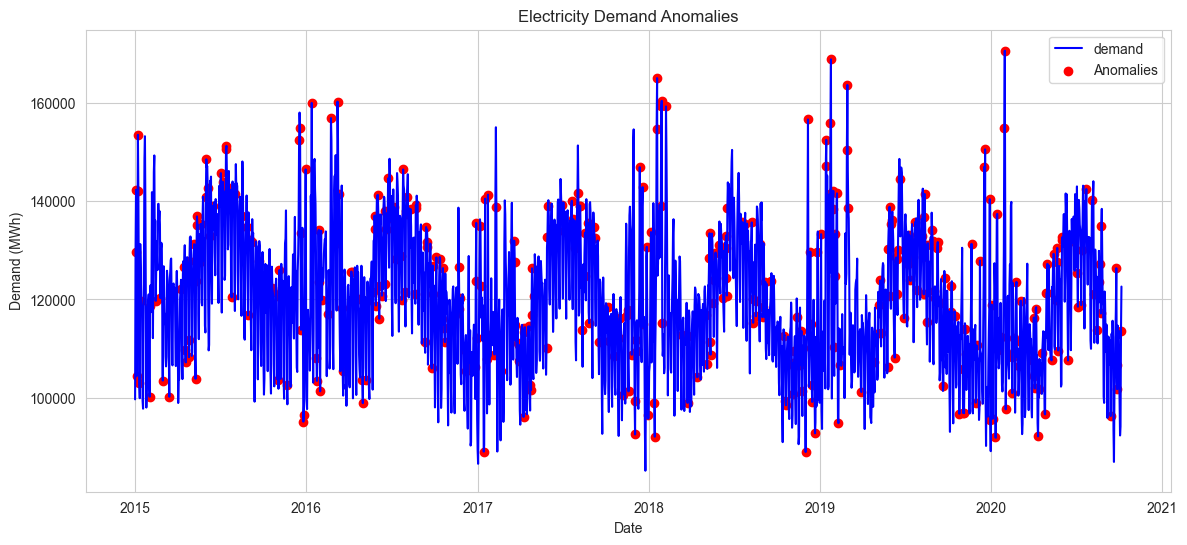

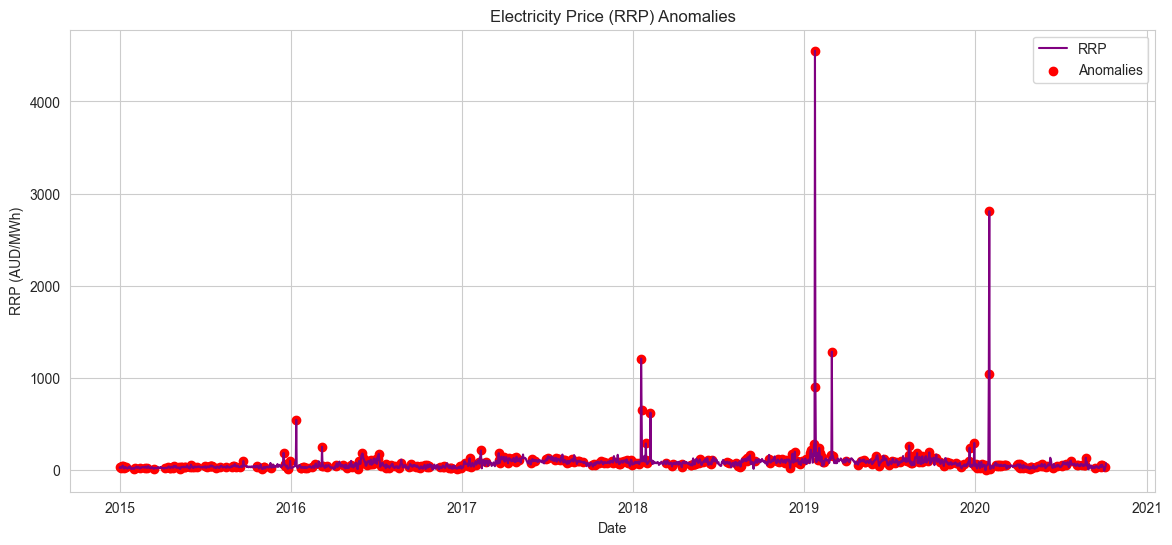

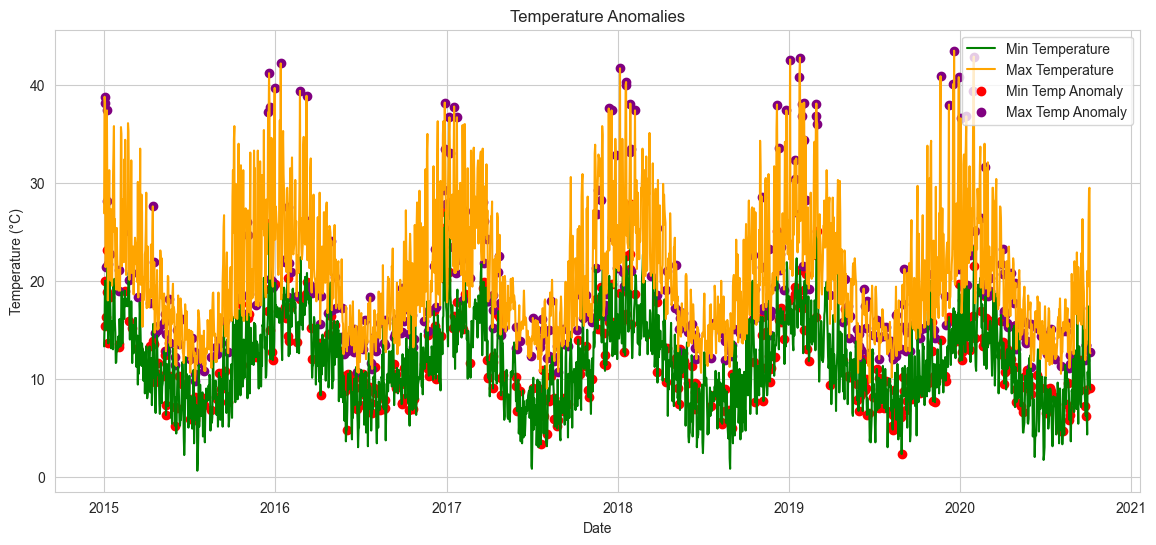

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = 'complete_dataset.csv'
df = pd.read_csv(file_path)
df.ffill(inplace=True)
# Convert 'date' to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
def detect_anomalies_iqr(series):
    Q1, Q3 = series.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)
anomaly_cols = ['demand', 'RRP', 'min_temperature', 'max_temperature', 'rainfall']
anomalies = df[anomaly_cols].apply(detect_anomalies_iqr)
anomalies_df = df[anomalies.any(axis=1)]
sns.set_style("whitegrid")
def plot_anomalies(data, column, title, ylabel, color, anomaly_color='red'):
    plt.figure(figsize=(14, 6))
    plt.plot(data.index, data[column], label=column, color=color)
    plt.scatter(anomalies_df.index, anomalies_df[column], color=anomaly_color, label='Anomalies', marker='o')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
plot_anomalies(df, 'demand', 'Electricity Demand Anomalies', 'Demand (MWh)', 'blue')
plot_anomalies(df, 'RRP', 'Electricity Price (RRP) Anomalies', 'RRP (AUD/MWh)', 'purple')
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['min_temperature'], label='Min Temperature', color='green')
plt.plot(df.index, df['max_temperature'], label='Max Temperature', color='orange')
plt.scatter(anomalies_df.index, anomalies_df['min_temperature'], color='red', label='Min Temp Anomaly', marker='o')
plt.scatter(anomalies_df.index, anomalies_df['max_temperature'], color='purple', label='Max Temp Anomaly', marker='o')
plt.title('Temperature Anomalies')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


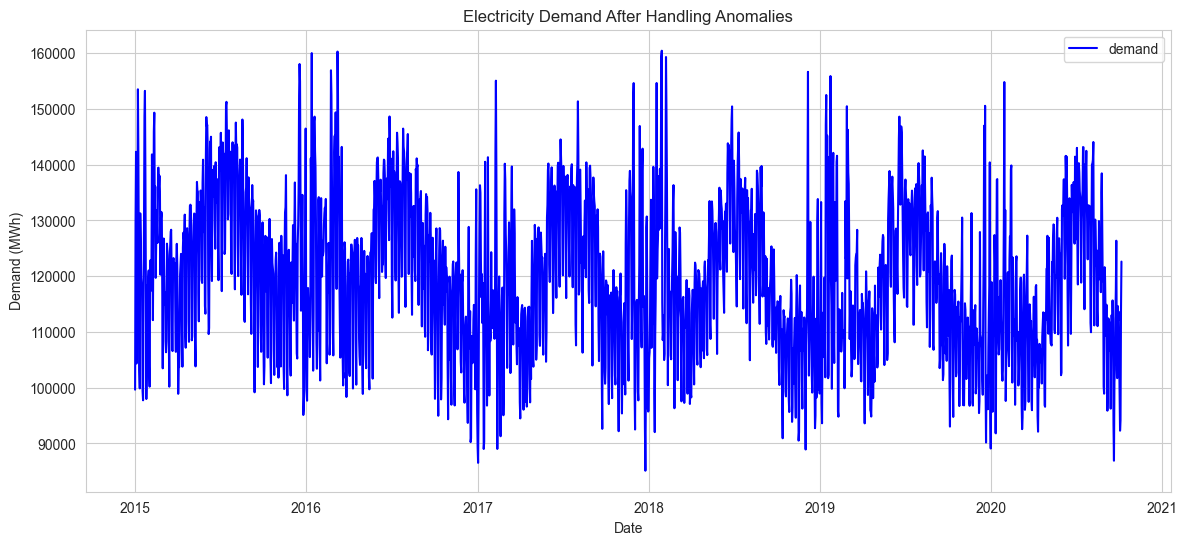

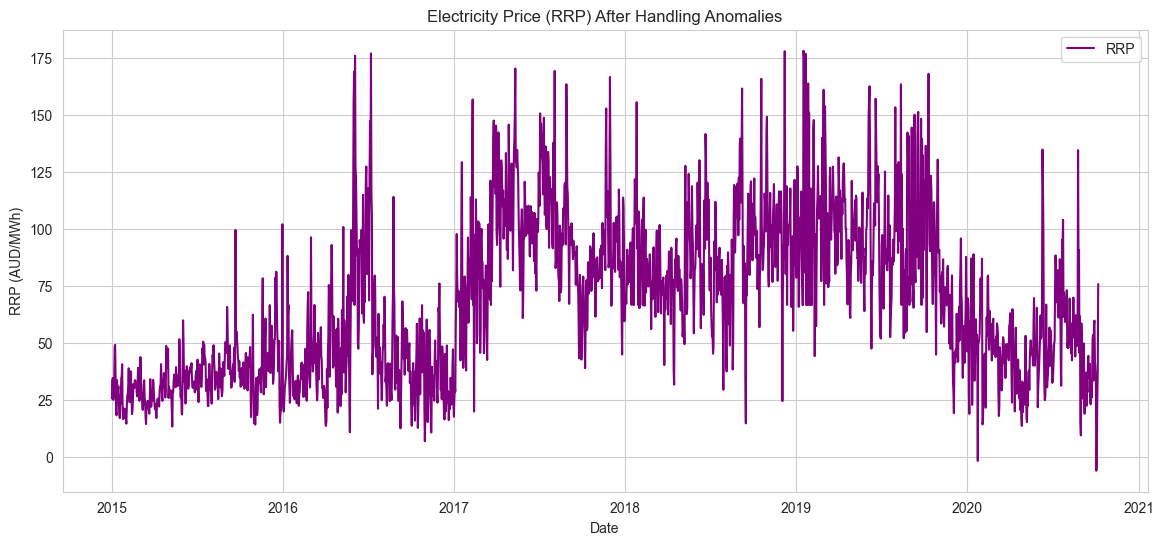

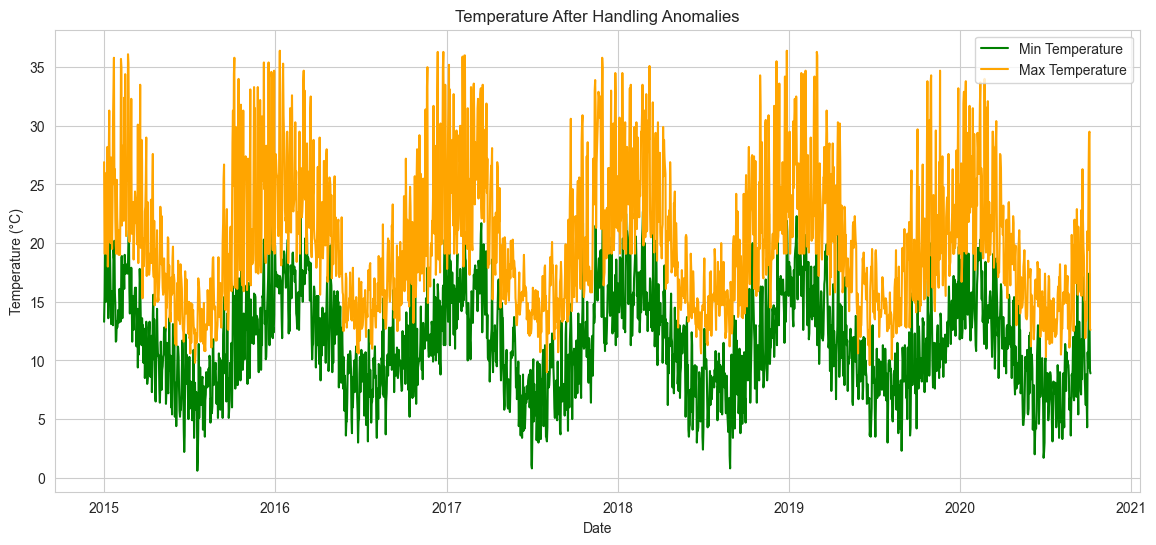

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = 'complete_dataset.csv'
df = pd.read_csv(file_path)
df.ffill(inplace=True)
# Convert 'date' to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
def detect_anomalies_iqr(series):
    Q1, Q3 = series.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)
anomaly_cols = ['demand', 'RRP', 'min_temperature', 'max_temperature', 'rainfall']
anomalies = df[anomaly_cols].apply(detect_anomalies_iqr)
for col in anomaly_cols:
    median_value = df[col].median() 
    df.loc[anomalies[col], col] = median_value 
sns.set_style("whitegrid")

def plot_data(data, column, title, ylabel, color):
    plt.figure(figsize=(14, 6))
    plt.plot(data.index, data[column], label=column, color=color)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
plot_data(df, 'demand', 'Electricity Demand After Handling Anomalies', 'Demand (MWh)', 'blue')
plot_data(df, 'RRP', 'Electricity Price (RRP) After Handling Anomalies', 'RRP (AUD/MWh)', 'purple')
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['min_temperature'], label='Min Temperature', color='green')
plt.plot(df.index, df['max_temperature'], label='Max Temperature', color='orange')
plt.title('Temperature After Handling Anomalies')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


# • Analyze periods of negative or low prices (RRP negative) and their causes.

Negative RRP Events:
                 RRP      demand  min_temperature  max_temperature  rainfall
date                                                                        
2020-01-23 -1.761423  112254.830             12.9             22.6      22.8
2020-10-02 -6.076028   99585.835             12.8             26.0       0.0
2020-10-03 -1.983471   92277.025             17.4             29.4       0.0


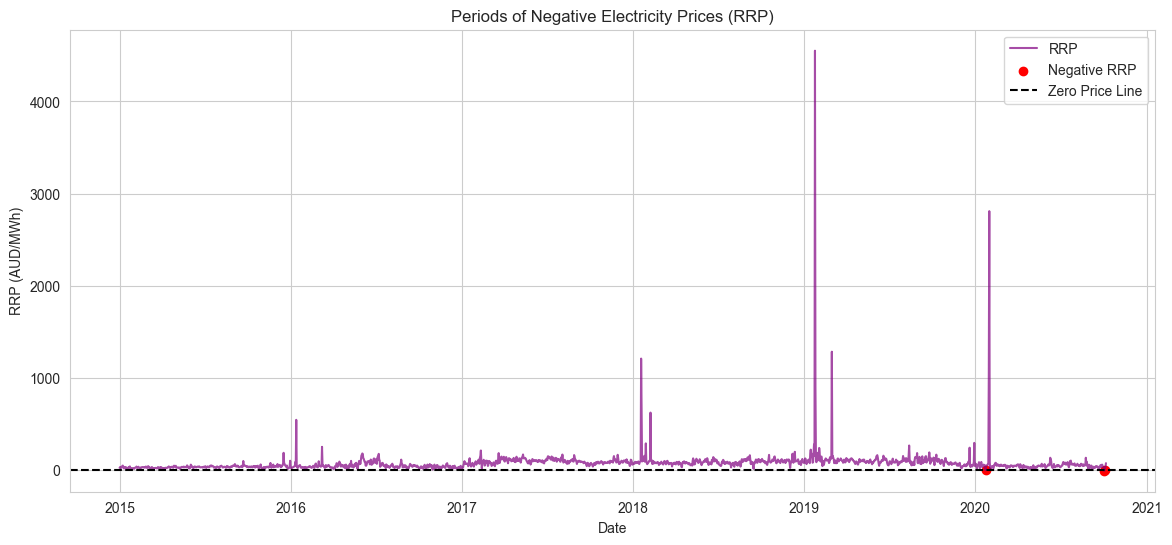

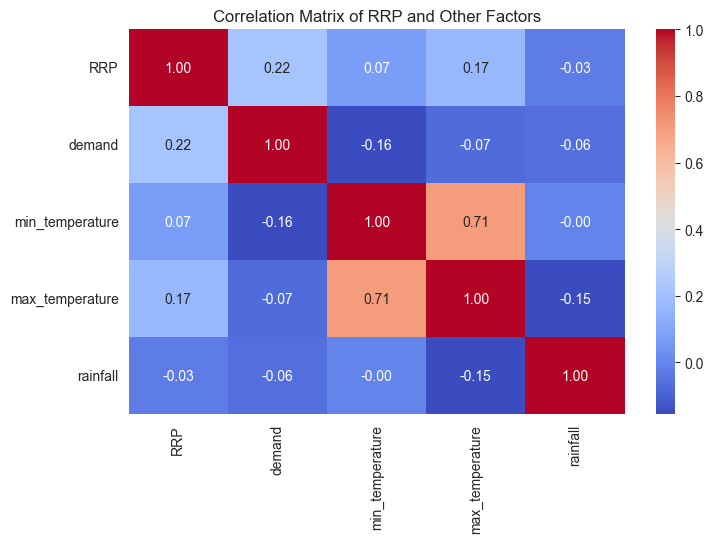

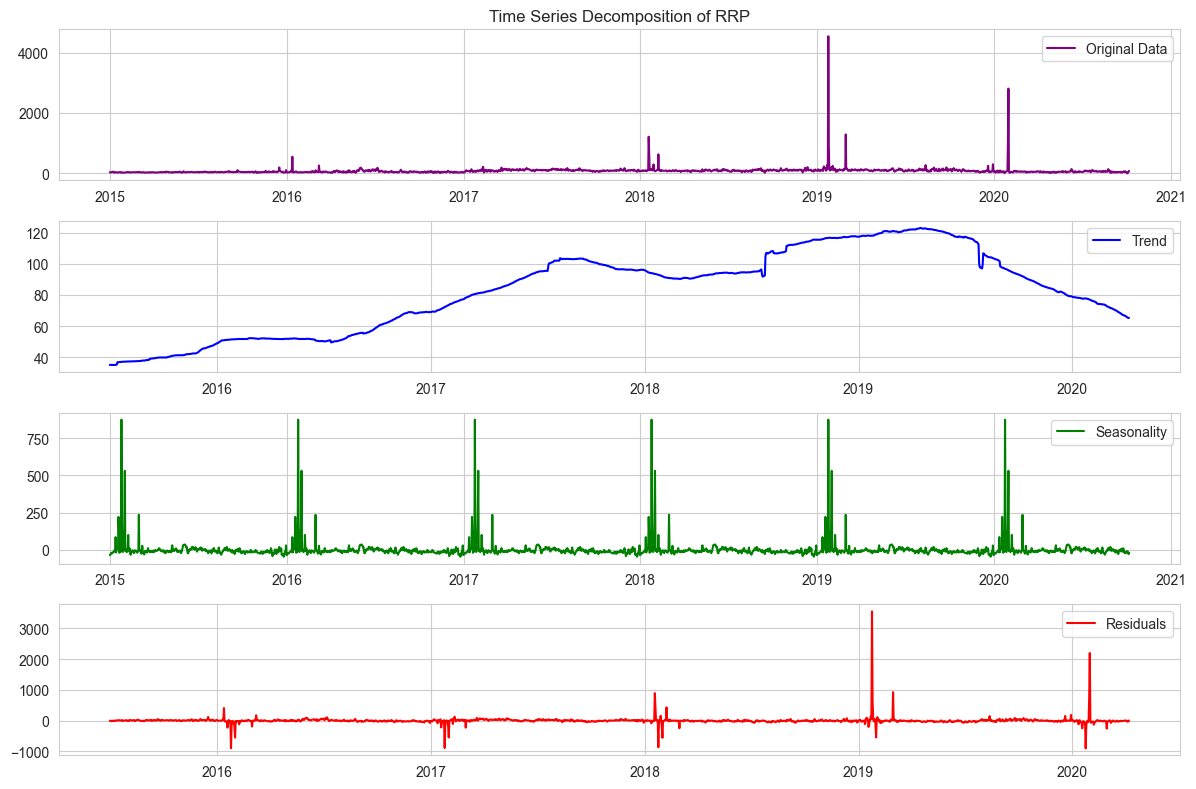

Total periods with negative RRP: 3
Total periods with very low RRP (<10 AUD/MWh): 5


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
file_path = 'complete_dataset.csv' 
df = pd.read_csv(file_path)
df.ffill(inplace=True)  # Forward fill missing values

# Convert 'date' to datetime and set it as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
negative_rrp_df = df[df['RRP'] < 0]  
low_rrp_df = df[df['RRP'] < 10]
print("Negative RRP Events:")
print(negative_rrp_df[['RRP', 'demand', 'min_temperature', 'max_temperature', 'rainfall']].head())
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['RRP'], label='RRP', color='purple', alpha=0.7)
plt.scatter(negative_rrp_df.index, negative_rrp_df['RRP'], color='red', label='Negative RRP', marker='o')
plt.axhline(y=0, color='black', linestyle='--', label='Zero Price Line')  # Reference line at 0
plt.title('Periods of Negative Electricity Prices (RRP)')
plt.xlabel('Date')
plt.ylabel('RRP (AUD/MWh)')
plt.legend()
plt.show()
correlation_matrix = df[['RRP', 'demand', 'min_temperature', 'max_temperature', 'rainfall']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of RRP and Other Factors")
plt.show()
df['RRP'] = df['RRP'].astype(float)  
decomposition = sm.tsa.seasonal_decompose(df['RRP'], model='additive', period=365) 
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df.index, df['RRP'], label='Original Data', color='purple')
plt.title('Time Series Decomposition of RRP')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.legend()

plt.tight_layout()
plt.show()
print(f"Total periods with negative RRP: {len(negative_rrp_df)}")
print(f"Total periods with very low RRP (<10 AUD/MWh): {len(low_rrp_df)}")


# Create lagged variables for demand and weather to capture delayed effects

In [68]:
import pandas as pd

# Define lag periods (1-day, 2-day, 3-day, and 7-day lags)
lag_days = [1, 2, 3, 7]

# Columns to lag
lag_columns = ['demand', 'min_temperature', 'max_temperature', 'rainfall']

# Create lagged features
for col in lag_columns:
    for lag in lag_days:
        df[f'{col}_lag{lag}'] = df[col].shift(lag)

# Drop rows with NaN values after shifting
df.dropna(inplace=True)
print(df.head())


                demand        RRP  demand_pos_RRP  RRP_positive  \
date                                                              
2015-01-08  142015.655  49.117280      142015.655     49.117280   
2015-01-09  121801.155  34.490675      121801.155     34.490675   
2015-01-10  103043.660  20.229825      103043.660     20.229825   
2015-01-11   99865.755  18.234768       99865.755     18.234768   
2015-01-12  131261.125  33.694810      131261.125     33.694810   

            demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
date                                                                         
2015-01-08             0.0           0.0              0.0             23.1   
2015-01-09             0.0           0.0              0.0             16.5   
2015-01-10             0.0           0.0              0.0             13.6   
2015-01-11             0.0           0.0              0.0             15.6   
2015-01-12             0.0           0.0              0.0     

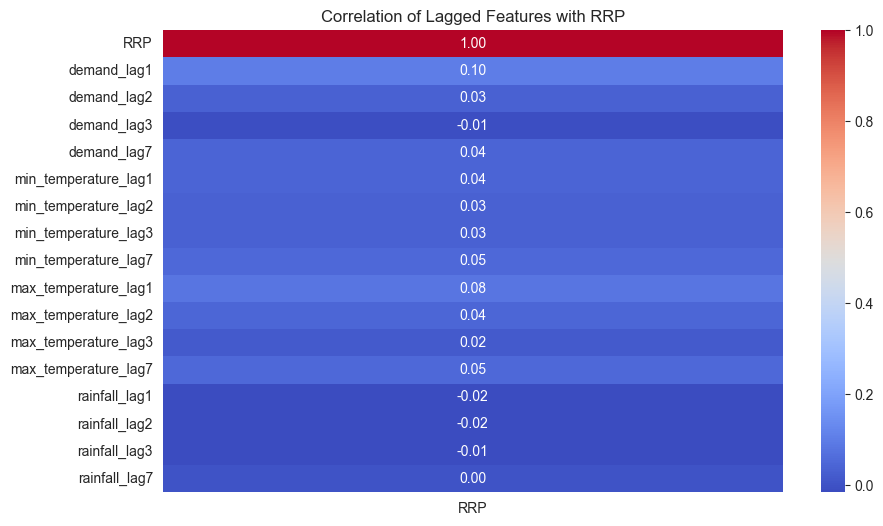

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df[['RRP'] + [f'{col}_lag{lag}' for col in lag_columns for lag in lag_days]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['RRP']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Lagged Features with RRP")
plt.show()
